In [185]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

df = pd.read_csv("Z:\HY_FA Returns_RawData3.csv")


In [186]:
df.head()

,Date,Class,OAS,WARF,ER_M,Trl_12M_ER
0,6/30/1997,HY,234.191194,2511.954598,0.058436,1.125060
1,7/31/1997,HY,238.945036,2545.137267,0.625331,-7.875162
2,8/29/1997,HY,238.492443,2546.640588,0.570790,-11.062994
3,9/30/1997,HY,229.248058,2566.289024,-1.389888,-11.505770
4,10/31/1997,HY,234.578430,2547.356658,0.644467,-7.850148


In [187]:
for x in df.columns.values:
    print x

Date
Class
OAS
WARF
ER_M
Trl_12M_ER


In [188]:
print df.shape
print df.dtypes
df.groupby('Class').describe()

(438, 6)
Date           object
Class          object
OAS           float64
WARF          float64
ER_M          float64
Trl_12M_ER    float64
dtype: object


ER_M          OAS  Trl_12M_ER         WARF
Class                                                        
FA    count  219.000000   219.000000  219.000000   219.000000
      mean     0.437741   493.903330    5.940631  2217.051323
      std      3.339246   297.400382   15.415901   564.023888
      min    -16.903170    98.434389  -41.701758  1089.394103
      25%     -0.680348   320.422205   -2.307634  1912.516217
      50%      0.508136   409.539837    5.043336  2149.727154
      75%      1.693797   580.586544   11.016680  2509.625961
      max     14.305583  2168.686985   80.711157  4294.971785
HY    count  219.000000   219.000000  219.000000   219.000000
      mean     0.125911   548.663136    1.918507  2816.609286
      std      3.074964   253.690081   14.036210   194.102819
      min    -16.451129    45.666083  -38.248613  2459.991621
      25%     -0.947605   378.066379   -6.311219  2699.914609
      50%      0.230338   505.259508    1.125060  2785.197795
      75%      1.420485   660.784037    8.914347  2904.073027
      max     12.793891  1801.705926   59.359183  3464.829626

In [189]:
print df.dtypes

Date           object
Class          object
OAS           float64
WARF          float64
ER_M          float64
Trl_12M_ER    float64
dtype: object


In [190]:
HY_data=df[df.Class == "HY"]

HY_data.head()


,Date,Class,OAS,WARF,ER_M,Trl_12M_ER
0,6/30/1997,HY,234.191194,2511.954598,0.058436,1.125060
1,7/31/1997,HY,238.945036,2545.137267,0.625331,-7.875162
2,8/29/1997,HY,238.492443,2546.640588,0.570790,-11.062994
3,9/30/1997,HY,229.248058,2566.289024,-1.389888,-11.505770
4,10/31/1997,HY,234.578430,2547.356658,0.644467,-7.850148


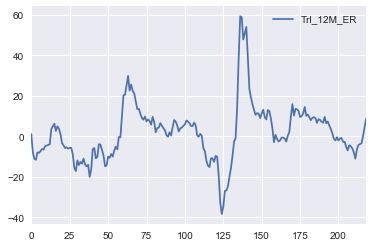

In [191]:
HY_data = HY_data[['Trl_12M_ER']].plot()


In [192]:
FA_data=df[df.Class == "FA"]
FA_data.head()

,Date,Class,OAS,WARF,ER_M,Trl_12M_ER
219,6/30/1997,FA,98.434389,1351.702971,-0.090524,1.022413
220,7/31/1997,FA,108.417683,1133.408090,0.343662,-4.799652
221,8/29/1997,FA,99.110148,1102.027493,0.106530,-5.212333
222,9/30/1997,FA,113.476066,1097.996259,-1.105227,-6.800029
223,10/31/1997,FA,110.344762,1119.201237,-0.049076,-4.357495


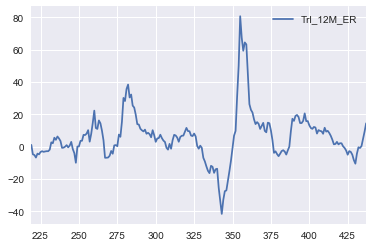

In [193]:
FA_data = FA_data[['Trl_12M_ER']].plot()

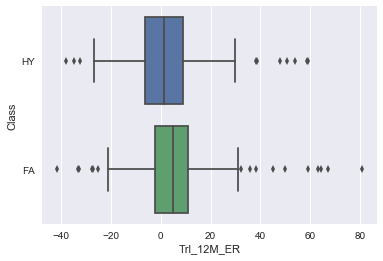

In [194]:
sns.boxplot(x='Trl_12M_ER', y='Class', data = df)

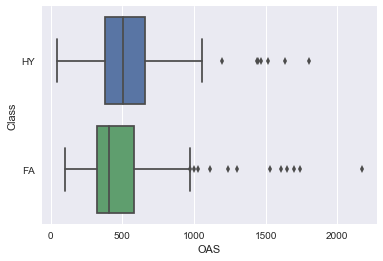

In [195]:
sns.boxplot(x='OAS', y='Class', data = df)

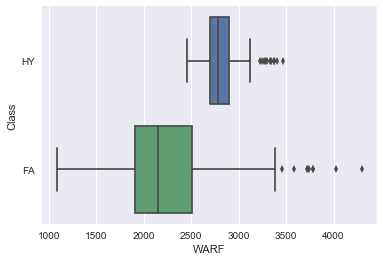

In [196]:
sns.boxplot(x='WARF', y='Class', data = df)

In [197]:
print df.sort('Trl_12M_ER').values

[['10/31/2007' 'FA' 420.17985580000004 2075.576033 -5.1768292019999995
  -41.70175776]
 ['10/31/2007' 'HY' 415.05156689999995 2767.829508 -5.254006532
  -38.24861334]
 ['11/30/2007' 'HY' 547.5265287000001 2800.603128 0.052708984 -34.78373072]
 ..., 
 ['1/30/2009' 'FA' 1530.219321 3731.179811 -3.142381195 64.49372115]
 ['11/26/2008' 'FA' 2168.6869850000003 4027.9994829999996 14.11118967
  67.36828964]
 ['10/31/2008' 'FA' 1606.192987 3234.3377530000002 -16.90316995 80.71115737]]


C:\Users\tlang\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [198]:
df.groupby('Class').Trl_12M_ER.mean()

Class
FA    5.940631
HY    1.918507
Name: Trl_12M_ER, dtype: float64

In [199]:
df.groupby('Class').mean()

,OAS,WARF,ER_M,Trl_12M_ER
Class,,,,
FA,493.903330,2217.051323,0.437741,5.940631
HY,548.663136,2816.609286,0.125911,1.918507


In [200]:
df.groupby('Class').median()

,OAS,WARF,ER_M,Trl_12M_ER
Class,,,,
FA,409.539837,2149.727154,0.508136,5.043336
HY,505.259508,2785.197795,0.230338,1.125060


In [201]:
df.groupby('Class').corr()

ER_M       OAS  Trl_12M_ER      WARF
Class                                                     
FA    ER_M        1.000000  0.201797    0.045726  0.199204
      OAS         0.201797  1.000000    0.735149  0.763483
      Trl_12M_ER  0.045726  0.735149    1.000000  0.588560
      WARF        0.199204  0.763483    0.588560  1.000000
HY    ER_M        1.000000  0.128729    0.067229  0.209771
      OAS         0.128729  1.000000    0.599478  0.305194
      Trl_12M_ER  0.067229  0.599478    1.000000  0.389771
      WARF        0.209771  0.305194    0.389771  1.000000

In [210]:
import statsmodels.formula.api as smf

X = df['Trl_12M_ER']
y = df['Class']


lm = smf.ols(formula='y ~ X', data=df).fit()
lm.summary()

ValueError: shapes (438,2) and (438,2) not aligned: 2 (dim 1) != 438 (dim 0)